In [2]:
# Loading the libraries
from util import *
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
d_datasets\preprocessed_german_credit.csv', index_col=0)
pred_true_classes = all_data[['predicted_class', 'true_class']]
errors = all_data['errors']
features = all_data.drop(['predicted_class', 'true_class', 'errors'], axis=1)
len(pred_true_classes)

169

## Scaling the features 

In [3]:
to_scale = features.columns
features[to_scale] = StandardScaler().fit_transform(features[to_scale])

features[:5]

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Savings_moderate,Savings_no_inf,Savings_quite rich,Savings_rich,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
136,-0.736682,0.222911,2.097685,0.541581,1.659987,-0.077152,-0.250785,-0.547723,-0.620682,-0.109435,...,-0.323381,-0.483298,-0.276465,3.789939,-0.657422,1.249242,-0.250785,1.249242,-0.761209,-0.191859
76,-0.098692,0.222911,0.299478,1.760861,-0.602414,-0.077152,-0.250785,-0.547723,1.611131,-0.109435,...,-0.323381,-0.483298,-0.276465,-0.263857,-0.657422,-0.800485,-0.250785,1.249242,-0.761209,-0.191859
280,-1.101248,0.222911,0.068512,-0.433842,1.659987,-0.077152,-0.250785,-0.547723,-0.620682,-0.109435,...,-0.323381,-0.483298,-0.276465,3.789939,-0.657422,1.249242,-0.250785,-0.800485,-0.761209,-0.191859
319,-0.736682,-1.346756,0.174903,-0.433842,-0.602414,-0.077152,-0.250785,1.825742,-0.620682,-0.109435,...,-0.323381,-0.483298,-0.276465,-0.263857,-0.657422,-0.800485,-0.250785,1.249242,-0.761209,-0.191859
174,-0.827824,0.222911,0.086308,0.053870,-0.602414,-0.077152,3.987480,-0.547723,-0.620682,-0.109435,...,-0.323381,-0.483298,-0.276465,-0.263857,-0.657422,-0.800485,-0.250785,1.249242,-0.761209,-0.191859


## The Bias-Aware Clustering Algorithm

iteration 1-----------------------------------------------------
Splitting on cluster 1
Mean F score of cluster 0=0.42937062937062936
Mean F score of remainder 0=0.5147563486616334
Mean F score of cluster 1=0.5147563486616334
Mean F score of remainder 1=0.42937062937062936


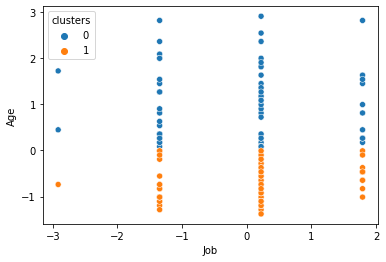

length of clustering_features169
          Age       Job  Credit amount  Duration  Purpose_car  \
136 -0.736682  0.222911       2.097685  0.541581     1.659987   
76  -0.098692  0.222911       0.299478  1.760861    -0.602414   
280 -1.101248  0.222911       0.068512 -0.433842     1.659987   
319 -0.736682 -1.346756       0.174903 -0.433842    -0.602414   
174 -0.827824  0.222911       0.086308  0.053870    -0.602414   
..        ...       ...            ...       ...          ...   
132 -0.736682 -1.346756      -0.186828 -0.433842    -0.602414   
185 -0.372116  0.222911      -0.708339 -0.433842    -0.602414   
41  -0.827824  0.222911      -0.786488 -0.677698    -0.602414   
108 -0.463258  0.222911       1.752590  0.297725    -0.602414   
56   1.541855  1.792578       1.267833 -0.677698    -0.602414   

     Purpose_domestic appliances  Purpose_education  \
136                    -0.077152          -0.250785   
76                     -0.077152          -0.250785   
280                  

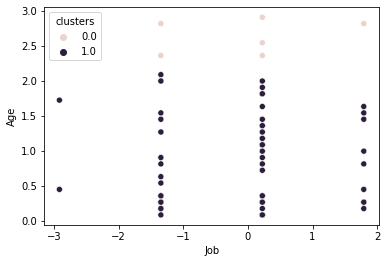

length of clustering_features169
          Age       Job  Credit amount  Duration  Purpose_car  \
136 -0.736682  0.222911       2.097685  0.541581     1.659987   
76  -0.098692  0.222911       0.299478  1.760861    -0.602414   
280 -1.101248  0.222911       0.068512 -0.433842     1.659987   
319 -0.736682 -1.346756       0.174903 -0.433842    -0.602414   
174 -0.827824  0.222911       0.086308  0.053870    -0.602414   
..        ...       ...            ...       ...          ...   
132 -0.736682 -1.346756      -0.186828 -0.433842    -0.602414   
185 -0.372116  0.222911      -0.708339 -0.433842    -0.602414   
41  -0.827824  0.222911      -0.786488 -0.677698    -0.602414   
108 -0.463258  0.222911       1.752590  0.297725    -0.602414   
56   1.541855  1.792578       1.267833 -0.677698    -0.602414   

     Purpose_domestic appliances  Purpose_education  \
136                    -0.077152          -0.250785   
76                     -0.077152          -0.250785   
280                  

ZeroDivisionError: division by zero

In [4]:
# TODO: experiment with differen random states, increase number of runs
clus_model_kwargs = {
    "n_clusters": 2,
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 2,
}

# Defining static parameters
MAX_ITER = 10 
x = 1 # cluster number
bias_prev_iteration_cluster = 0

for i in range(1, MAX_ITER):
    print("iteration " + str(i) + "-----------------------------------------------------")
    print('Splitting on cluster', x)
    # Select the cluster with the highest bias 
    high_bias_cluster = clustering_features.loc[clustering_features['clusters'] == x]
    
    # Apply Kmeans 
    high_bias_cluster.drop('clusters', axis=1)
    kmeans_algo = KMeans(**clus_model_kwargs).fit(high_bias_cluster) 
    new_clusters = pd.DataFrame(kmeans_algo.predict(high_bias_cluster),index=high_bias_cluster.index)

    new_clusters = new_clusters.join(pred_true_classes)
    old_clusters = pd.DataFrame(clustering_features["clusters"]).join(pred_true_classes)
    print("new_clusters")
    print("old_clusters")
    # TODO: Solve error below
    print("!!!!!!!! There are NANS in the 2nd iteration of in clustering features!")
    new_clusters["clusters"] = new_clusters[0].combine_first(old_clusters["clusters"])
   
    # calculate bias for each of the two clusters
    negative_bias_0 = calculate_bias(new_clusters, 0)
    negative_bias_1 = calculate_bias(new_clusters, 1)

    if max(negative_bias_0, negative_bias_1) >= bias_prev_iteration_cluster:
        # select cluster with highest negative bias and merge new cluster assignments with the df
        bias_prev_iteration_cluster = max(negative_bias_0, negative_bias_1)
        clustering_features["clusters"] = new_clusters["clusters"]
        plot_clusters(clustering_features)
    else:
        break
        print('no clusters with a higher bias are left')
    clustering_features = clustering_features.join(errors, how='left')
    x = get_highest_var_cluster(clustering_features)
    clustering_features = clustering_features.drop('errors', axis=1)
    print('the end')


In [48]:
# exporting the biased cluster dataframe for further analysis
# resulting_cluster.to_csv('biased_credit_cluster.csv')